In [1]:
ls

drive/  sample_data/


In [2]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [3]:
ls

flowers/  Flowers-Dataset.zip  flowers.h5


In [5]:
!unzip Flowers-Dataset.zip 

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True)

In [24]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [38]:
X_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(64,64),class_mode="categorical",batch_size=32)

Found 4317 images belonging to 5 classes.


In [39]:
X_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(64,64),class_mode="categorical",batch_size=32)

Found 4317 images belonging to 5 classes.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense


In [29]:
model=Sequential()

In [30]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [31]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
model.add(Flatten())

In [33]:
model.add(Dense(300,activation="relu"))

In [34]:
model.add(Dense(5,activation="softmax"))

In [36]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [40]:
model.fit(X_train,epochs=5,validation_data=X_test,steps_per_epoch=len(X_train),validation_steps=len(X_test))

Epoch 1/5
135/135 [==============================] - 57s 421ms/step - loss: 0.7653 - accuracy: 0.7007 - val_loss: 0.6895 - val_accuracy: 0.7623
Epoch 2/5
135/135 [==============================] - 60s 444ms/step - loss: 0.7271 - accuracy: 0.7264 - val_loss: 0.6182 - val_accuracy: 0.7853
Epoch 3/5
135/135 [==============================] - 59s 435ms/step - loss: 0.6736 - accuracy: 0.7487 - val_loss: 0.6199 - val_accuracy: 0.7918
Epoch 4/5
135/135 [==============================] - 58s 433ms/step - loss: 0.6211 - accuracy: 0.7751 - val_loss: 0.5924 - val_accuracy: 0.8017
Epoch 5/5
135/135 [==============================] - 59s 439ms/step - loss: 0.5611 - accuracy: 0.7968 - val_loss: 0.5622 - val_accuracy: 0.7992


In [41]:
model.save("flowers.h5")

In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [43]:
model=load_model("/content/drive/MyDrive/CNN/flowers.h5")

In [44]:
img=image.load_img("/content/drive/MyDrive/CNN/flowers/rose/10503217854_e66a804309.jpg",target_size=(64,64))

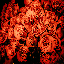

In [45]:
img

In [46]:
x=image.img_to_array(img)

In [47]:
x

array([[[  0.,   2.,   0.],
        [  0.,   2.,   0.],
        [  0.,   2.,   0.],
        ...,
        [ 92.,  14.,   0.],
        [ 61.,  13.,   9.],
        [ 17.,   7.,   5.]],

       [[  0.,   2.,   0.],
        [  0.,   2.,   0.],
        [  0.,   2.,   0.],
        ...,
        [150.,   3.,   0.],
        [ 85.,  10.,   7.],
        [119.,   4.,   1.]],

       [[  0.,   2.,   0.],
        [  0.,   2.,   0.],
        [  0.,   2.,   0.],
        ...,
        [ 88.,   9.,   0.],
        [207.,   7.,  10.],
        [152.,   0.,   0.]],

       ...,

       [[  0.,   4.,   0.],
        [  1.,   3.,   0.],
        [  0.,   2.,   0.],
        ...,
        [  2.,   2.,   4.],
        [  0.,   2.,   5.],
        [ 51.,  10.,   6.]],

       [[  0.,   2.,   0.],
        [  1.,   3.,   0.],
        [  1.,   3.,   0.],
        ...,
        [  0.,   3.,   1.],
        [  0.,   3.,   4.],
        [  0.,   5.,   3.]],

       [[  1.,   3.,   0.],
        [  0.,   2.,   0.],
        [  1.,  

In [49]:
x.ndim


3

In [50]:
x=np.expand_dims(x,axis=0)

In [51]:
x.ndim

4

In [53]:
pred=model.predict(x)

1/1 [==============================] - 0s 145ms/step


In [54]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [55]:
Label=['Display','Dndelion','Rose','Sunflower','Tulip']

In [56]:
Label[np.argmax(pred)]

'Rose'